# Aerial Bombing

source : https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('Weather.csv')

c:\users\marwane\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(119040, 31)

### Statistical details

In [7]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


   ### graphing the relationship between between MinTemp & MaxTemp

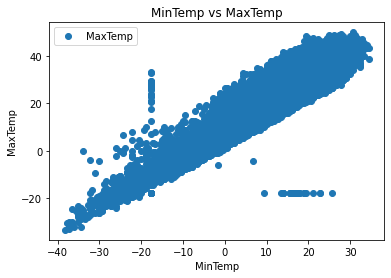

In [8]:
df.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

### Draw a linear regression line over the graph

(-40.0, 54.1666666665)

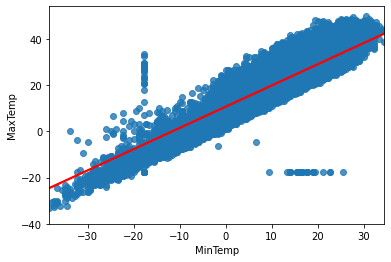

In [9]:
sns.regplot(x='MinTemp',y='MaxTemp',data=df,line_kws={'color':'red'})
plt.ylim(-40,)

# Using sklearn

In [10]:
from sklearn.linear_model import LinearRegression

### Create a linear Regression object

In [11]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
X = df[['MinTemp']]
Y = df[['MaxTemp']]

### Fit the linear model

In [13]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Output a prediction

In [14]:
yhat = lm.predict(X)
yhat[:5]

array([[31.11777216],
       [30.60734204],
       [31.11777216],
       [31.11777216],
       [30.60734204]])

In [15]:
yhat.shape

(119040, 1)

### Intercept

In [16]:
lm.intercept_

array([10.70056704])

### Slope

In [17]:
lm.coef_

array([[0.91877423]])

### Estimated Linear Model

**Yhat = a + bX**

**MaxTemp** = 0.918 + 10.70 X **MinTemp**

### Visualization comparison between Actual and fitted (predicted) data

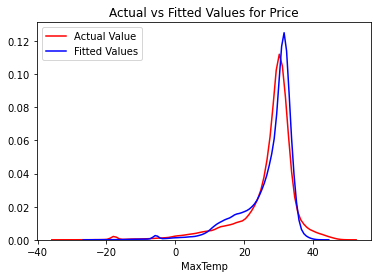

In [25]:
ax1 = sns.distplot(df['MaxTemp'],hist=False, color="r", label="Actual Value")
sns.distplot(yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

### Evaluating the model

* **R^2**

In [27]:
lm.score(X,Y)

0.7715582862315506

* **MSE**

In [28]:
from sklearn.metrics import mean_squared_error

In [30]:
mse = mean_squared_error(df['MaxTemp'],yhat)
mse

17.36149912658331

## Predicting 'MaxTemp' based on 'MinTemp' with Train/Test

We train the data by splitting 80% of it for training, and 20% for tests

In [22]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [33]:
X_train

,MinTemp
36004,22.222222
116838,17.777778
46809,-9.444444
109656,22.222222
61397,18.888889
...,...
45891,-1.666667
117952,19.444444
42613,3.333333
43567,10.000000


In [34]:
Y_train

,MaxTemp
36004,27.222222
116838,32.777778
46809,8.888889
109656,31.666667
61397,35.000000
...,...
45891,5.000000
117952,32.222222
42613,4.444444
43567,14.444444


In [37]:
X_test

,MinTemp
21441,25.000000
5719,21.111111
52102,17.222222
8775,22.222222
88657,5.555556
...,...
102987,23.333333
32667,20.000000
60884,23.888889
2337,21.666667


In [36]:
Y_test

,MaxTemp
21441,28.888889
5719,31.111111
52102,27.222222
8775,28.888889
88657,23.333333
...,...
102987,32.777778
32667,32.222222
60884,31.111111
2337,31.111111


### Training the algorithm

In [38]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Finding the intercept and slope for the training value

In [40]:
print("Intercept : ",lm.intercept_)

print("Slope : ",lm.coef_)

Intercept :  [10.66185201]
Slope :  [[0.92033997]]


### Making predictions with the testing data

In [45]:
y_pred = lm.predict(X_test)

In [48]:
y_pred

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

In [57]:
y_pred.flatten()

array([33.67035117, 30.0912513 , 26.51215143, ..., 32.64775121,
       30.60255128, 31.62515124])

### Comparing the actual values for X_test with the predicted ones

In [75]:
df_test = pd.DataFrame({'Actual':Y_test.to_numpy().flatten(),'Predicted':y_pred.flatten()})

In [76]:
df_test.head(15)

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
5,37.222222,30.602551
6,22.222222,11.684452
7,35.555556,33.670351
8,30.555556,30.602551
9,28.888889,32.647751


### Visualizing the comparison

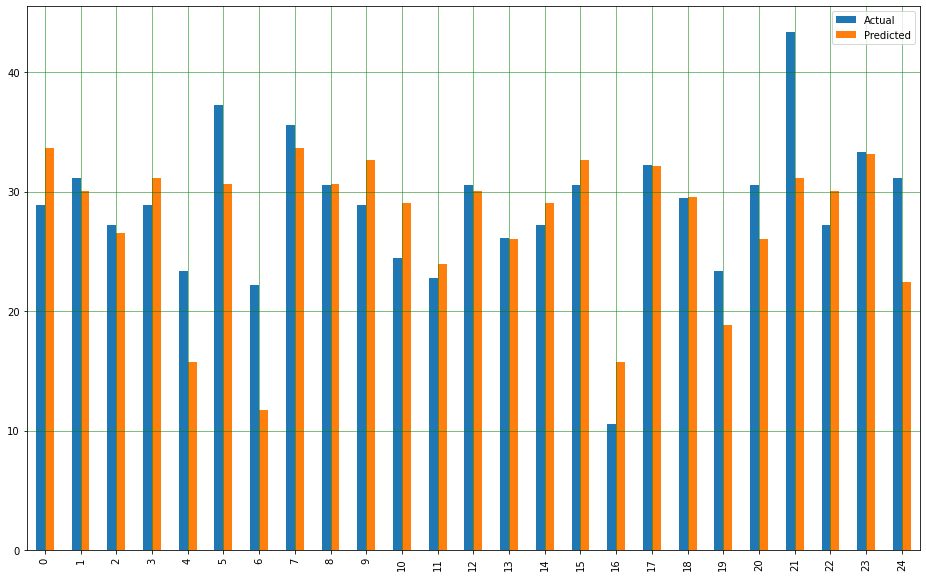

In [77]:
df1 = df_test.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Plotting straight line with test data

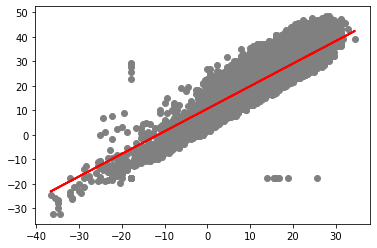

In [79]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Evaluating the model

In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 3.199329178378542
Mean Squared Error: 17.63156809756847
Root Mean Squared Error: 4.198996082109207
